Rishika Endal


1002031323

References:
https://www.kaggle.com/code/gauravduttakiit/class-dataset-mango-leaf-disease 
https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/ 
Scikit-learn documentation on Multinomial Naive Bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
A tutorial on implementing Multinomial Naive Bayes classifier in Python: https://towardsdatascience.com/naive-bayes-classifier-for-text-classification-with-python-76d31a0b2e00 
Scikit-learn documentation on KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
Tutorial on KNN classification in Python: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
KNN classification example using Python and Scikit-learn: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9

In [121]:

!pip install opendatasets 
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:

import opendatasets as od
import shutil, os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, Sequential, models
import pathlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import shutil, os

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [123]:
od.download("https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset")

Skipping, found downloaded files in "./mango-leaf-disease-dataset" (use force=True to force download)


In [124]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/mango-leaf-disease-dataset'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

['/content/mango-leaf-disease-dataset/Die Back/20211129_161808 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_162050 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_160506 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_161805 (Custom).jpg',
 '/content/mango-leaf-disease-dataset/Die Back/20211129_160544 (Custom).jpg']

In [125]:
train=pd.DataFrame()
train=train.assign(filename=Id)
train.head()

,filename
0,/content/mango-leaf-disease-dataset/Die Back/2...
1,/content/mango-leaf-disease-dataset/Die Back/2...
2,/content/mango-leaf-disease-dataset/Die Back/2...
3,/content/mango-leaf-disease-dataset/Die Back/2...
4,/content/mango-leaf-disease-dataset/Die Back/2...


In [126]:
train['label']=train['filename']
train['label']=train['label'].str.replace('/content/mango-leaf-disease-dataset/','')
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_161808 (Custom).jpg
1,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_162050 (Custom).jpg
2,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_160506 (Custom).jpg
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_161805 (Custom).jpg
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back/20211129_160544 (Custom).jpg


In [127]:
train['label'] = train['label'].str.split('/').str[0]
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
1,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
2,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back


In [128]:
train=train.sample(n=len(train))
train.reset_index(inplace=True,drop=True)
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge
1,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
2,/content/mango-leaf-disease-dataset/Bacterial ...,Bacterial Canker
3,/content/mango-leaf-disease-dataset/Sooty Moul...,Sooty Mould
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back


In [129]:
test=train[int(len(train)*.8):]
test.head()

,filename,label
3200,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy
3201,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge
3202,/content/mango-leaf-disease-dataset/Powdery Mi...,Powdery Mildew
3203,/content/mango-leaf-disease-dataset/Cutting We...,Cutting Weevil
3204,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose


In [130]:
test=test.sample(n=len(test))
test.reset_index(inplace=True,drop=True)
test.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Cutting We...,Cutting Weevil
1,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
2,/content/mango-leaf-disease-dataset/Bacterial ...,Bacterial Canker
3,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back


In [131]:
train=train[:int(len(train)*.8)]
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge
1,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
2,/content/mango-leaf-disease-dataset/Bacterial ...,Bacterial Canker
3,/content/mango-leaf-disease-dataset/Sooty Moul...,Sooty Mould
4,/content/mango-leaf-disease-dataset/Die Back/2...,Die Back


In [132]:
train=train.sample(n=len(train))
train.reset_index(inplace=True,drop=True)
train.head()

,filename,label
0,/content/mango-leaf-disease-dataset/Powdery Mi...,Powdery Mildew
1,/content/mango-leaf-disease-dataset/Healthy/20...,Healthy
2,/content/mango-leaf-disease-dataset/Gall Midge...,Gall Midge
3,/content/mango-leaf-disease-dataset/Powdery Mi...,Powdery Mildew
4,/content/mango-leaf-disease-dataset/Die Back/I...,Die Back


In [133]:
train.shape,test.shape

((3200, 2), (800, 2))

In [134]:
labels = train.sort_values('label')
labels.head()

,filename,label
2848,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
284,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
1629,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
2751,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose
1821,/content/mango-leaf-disease-dataset/Anthracnos...,Anthracnose


In [135]:
# take unique labels
class_names = list(labels.label.unique())
class_names[:8]

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [136]:
newpath = r'./train' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [137]:


#creating subfolders
for c in class_names:
    dest =  r'./train/'+str(c)
    if not os.path.exists(dest):
        os.makedirs(dest)
    for i in list(labels[labels['label']==c]['filename']): # Image Id
        get_image = os.path.join('/content/mango-leaf-disease-dataset', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)

In [138]:
newpath = r'./test' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [139]:
for c in class_names:
    dest =  r'./test/'+str(c)
    os.makedirs(dest, exist_ok=True)
    for i in list(test[test['label']==c]['filename']):
        get_image = os.path.join('/kaggle/input/mango-leaf-disease-dataset', i)
        move_image_to_cat = shutil.copy(get_image, dest)


In [140]:
train.to_csv('./train.csv',index=False)
test.to_csv('./test.csv',index=False)

In [141]:

# Split the data into features and labels
X_train = train['filename']
y_train = train['label']


CONVOLUTION NUERAL NETWORK

In [142]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# read images from file paths and convert them into numpy arrays
IMAGE_SIZE = 224
CHANNELS=3

X = np.zeros((len(train), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(train['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X[i] = img_to_array(img)

# extract labels
y = train['label'].values

# split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:

# read test images and convert them into numpy arrays
X_test = np.zeros((len(test), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(test['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X_test[i] = img_to_array(img)

# extract test labels
y_test = test['label'].values


In [144]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
NUM_CLASSES=8
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_val = to_categorical(y_val, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [146]:

#Different Layers in Convolution Nueral Network
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])



In [147]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 26, 26, 128)     

In [148]:

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

# Define the optimizer with a learning rate of 0.001 and momentum of 0.9
optimizer = SGD(learning_rate=0.001, momentum=0.9)

# Define the loss function as mean absolute error
loss = MeanSquaredError()

# Compile the model with the new optimizer and loss function
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])


In [149]:
# Training the model 
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
80/80 [==============================] - 405s 5s/step - loss: 0.2189 - accuracy: 0.1203 - val_loss: 0.2199 - val_accuracy: 0.1203
Epoch 2/5
80/80 [==============================] - 407s 5s/step - loss: 0.2198 - accuracy: 0.1207 - val_loss: 0.2199 - val_accuracy: 0.1203
Epoch 3/5
80/80 [==============================] - 407s 5s/step - loss: 0.2198 - accuracy: 0.1207 - val_loss: 0.2199 - val_accuracy: 0.1203
Epoch 4/5
80/80 [==============================] - 403s 5s/step - loss: 0.2198 - accuracy: 0.1207 - val_loss: 0.2199 - val_accuracy: 0.1203
Epoch 5/5
80/80 [==============================] - 403s 5s/step - loss: 0.2198 - accuracy: 0.1207 - val_loss: 0.2199 - val_accuracy: 0.1203


NAIVE BAYES CLASSIFIER

In [150]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.preprocessing.image import load_img, img_to_array
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [152]:

X_train = np.zeros((len(train), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(train['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X_train[i] = img_to_array(img)

In [ ]:
# getting trainlabels
y_train = train['label'].values

In [153]:

X_test = np.zeros((len(test), IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=np.uint8)
for i, filepath in enumerate(test['filename']):
    img = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    X_test[i] = img_to_array(img)


In [ ]:
# getting test labels
y_test = test['label'].values

In [154]:

X_train = X_train.reshape(len(train), -1)
     

In [155]:
from sklearn.naive_bayes import MultinomialNB
     
nbc_model = MultinomialNB(alpha=0.1, fit_prior=False)
nb_model = mnb_model.fit(X_train,y_train)
     

In [156]:
# Predict the labels for the training data
nbc_y_pred_train = mnb_model.predict(X_train.reshape(len(train), -1))

In [157]:
mnb_acc_train = accuracy_score(y_train, nbc_y_pred_train)


Training accuracy: 0.528125


In [ ]:
print('naive bayes training accuracy:', mnb_acc_train)

In [158]:

nbc_y_pred_test = nb_model.predict(X_test.reshape(len(test), -1))

# evaluate the accuracy of the classifier on the test data
mnb_acc_test = accuracy_score(y_test, nbc_y_pred_test)
print('Test accuracy:', mnb_acc_test)

Test accuracy: 0.5175


In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mnb_acc_test = accuracy_score(y_test, nbc_y_pred_test)
print('Accuracy:', mnb_acc_test)

mnb_pre_test = precision_score(y_test, nbc_y_pred_test, average='macro')
print('Precision:', mnb_pre_test)


Accuracy: 0.5175
Precision: 0.507283526363177


In [160]:
from sklearn.metrics import classification_report

#Printing the classification report
cr = classification_report(nbc_y_pred_test, y_test, output_dict=True)
dfmnb = pd.DataFrame(cr).T.reset_index()
dfmnb


,index,precision,recall,f1-score,support
0,Anthracnose,0.437500,0.488372,0.461538,86.0000
1,Bacterial Canker,0.605263,0.522727,0.560976,132.0000
2,Cutting Weevil,0.795918,0.672414,0.728972,116.0000
3,Die Back,0.586207,0.708333,0.641509,96.0000
4,Gall Midge,0.280899,0.362319,0.316456,69.0000
5,Healthy,0.549020,0.486957,0.516129,115.0000
6,Powdery Mildew,0.337209,0.408451,0.369427,71.0000
7,Sooty Mould,0.474747,0.408696,0.439252,115.0000
8,accuracy,0.517500,0.517500,0.517500,0.5175
9,macro avg,0.508345,0.507284,0.504282,800.0000


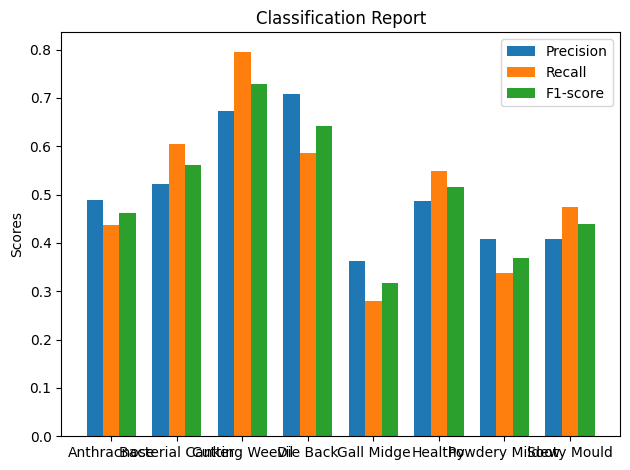

In [161]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

report = classification_report(y_test, nbc_y_pred_test, target_names=class_names, output_dict=True)
precision = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]

x = np.arange(len(class_names))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

fig.tight_layout()

plt.show()


K-NEAREST NEIGHBOR

In [162]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [178]:

knn_neighbors=5
knn_clf = KNeighborsClassifier(knn_neighbors)




In [179]:
# Train 
knn_model=knn_clf.fit(X_train, y_train)

# Predict 
knn_y_pred_train = knn_clf.predict(X_train)

In [180]:

knn_train_acc = accuracy_score(y_train, knn_y_pred_train)
print('Train accuracy:', knn_train_acc)

Train accuracy: 0.7790625


In [181]:

# Predicting the labels for the test data
knn_y_pred_test = knn_clf.predict(X_test.reshape(len(test), -1))


Test accuracy: 0.68875


In [182]:
# Evaluate the accuracy of the classifier
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
print('Test accuracy:', knn_acc_test)

Test accuracy: 0.68875


In [183]:
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
print('Test Accuracy:', knn_acc_test)


Test Accuracy: 0.68875


In [184]:
knn_pre_test = precision_score(y_test, knn_y_pred_test, average='macro')
print('Test Precision:', knn_pre_test)

Test Precision: 0.7128018912496418


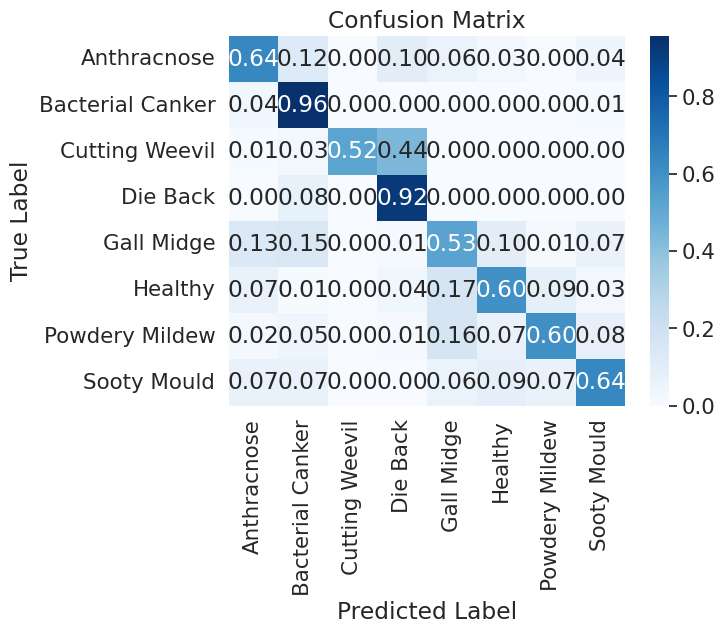

In [176]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# confusion matrix creation
cm = confusion_matrix(y_test, knn_y_pred_test)

# Define the class names
class_names = np.unique(y_test)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Set the font scale for the heatmap
sns.set(font_scale=1.4)

# Create the heatmap
ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues')

# Set the x and y axis labels and the title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()




     

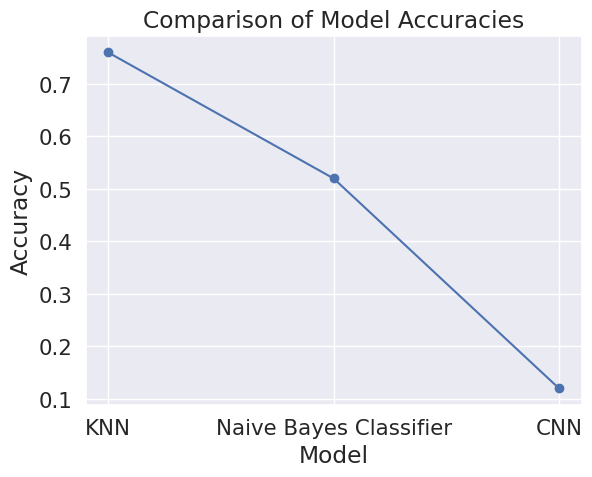

In [185]:
import matplotlib.pyplot as plt

# List of model accuracies
model_accuracies = []

# Add accuracy of model 1
model1_acc = 0.12
model_accuracies.append({'model_name': 'CNN', 'accuracy': model1_acc})

# Add accuracy of model 2
model2_acc = 0.76
model_accuracies.append({'model_name': 'KNN', 'accuracy': model2_acc})

# Add accuracy of model 3
model3_acc = 0.52
model_accuracies.append({'model_name': 'Naive Bayes Classifier', 'accuracy': model3_acc})

# Sort the models by accuracy (highest first)
sorted_models = sorted(model_accuracies, key=lambda x: x['accuracy'], reverse=True)

# Extract the model names and accuracy scores into separate lists
model_names = [model['model_name'] for model in sorted_models]
accuracy_scores = [model['accuracy'] for model in sorted_models]

# Create a line graph of the accuracy scores for each model
plt.plot(model_names, accuracy_scores, marker='o')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the line graph
plt.show()